In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering

In [3]:
df = pd.read_csv('datasets/wholesale_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 8)

In [5]:
df.dropna()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [7]:
df.drop(columns=['Channel','Region'],axis=1,inplace=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [10]:
scaled_X = StandardScaler().fit_transform(df.values)

In [43]:
clusters = range(1,26)
inertia = []
results = 0

for c in clusters:
    kmeans = KMeans(n_clusters=c, tol = 0.01, random_state=0).fit(scaled_X)
    results = kmeans.inertia_
    inertia.append(round(results,2))

print("The inertia for each cluster:",inertia)

The inertia for each cluster: [2640.0, 1954.8, 1620.47, 1312.81, 1059.15, 916.89, 832.61, 741.28, 662.45, 609.17, 558.58, 524.59, 496.0, 467.33, 438.43, 409.74, 386.23, 370.27, 351.77, 328.16, 298.97, 291.04, 276.51, 269.65, 258.81]


Text(0, 0.5, 'inertia')

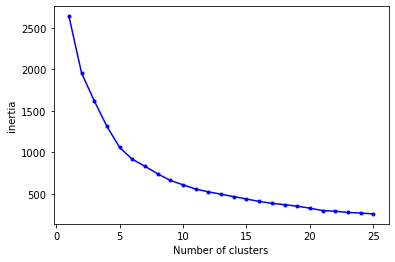

In [44]:
plt.plot(clusters,inertia, marker='.',c='blue')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')

In [45]:
kmeans_optimal = KMeans(n_clusters=5, tol = 0.01, random_state=0).fit_predict(scaled_X)
df["clusters"] = kmeans_optimal.tolist()
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0


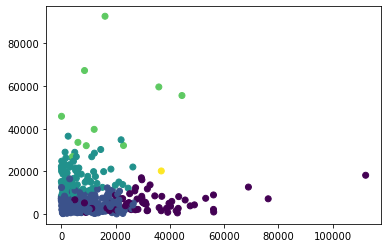

In [47]:
plt.scatter(df["Fresh"],df["Grocery"],c=df.clusters)

In [48]:
agg_cluster= AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = agg_cluster.fit_predict(scaled_X)

In [49]:
df['agg_clusters'] = clusters.tolist()

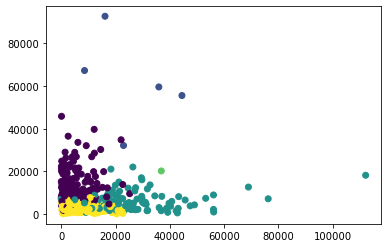

In [50]:
plt.scatter(df["Fresh"],df["Grocery"],c=df.agg_clusters)